In [1]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd
import jieba
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('./pos_weibo_text_score.csv', index_col='id', names=['id','score','content','date','time','device','opt_time'])[:1000]
corpus = data['content'].values
vectorizer = TfidfVectorizer()
word_corpus = []
for text in corpus:
    word_corpus.append(" ".join([word for word in jieba.lcut(text) if len(word) > 1 and \
                                 str(word).isalpha() and word not in stop_words]))

X = vectorizer.fit_transform(word_corpus)
import matplotlib.pyplot as plt
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=100,random_state=0)
    km.fit(X)
    #获取K-means算法的SSE
    distortions.append(km.inertia_)
#绘制曲线
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("num")
plt.ylabel("SSE")
plt.show()

In [2]:
stop_words = set()
with open('stopwords_cn.txt',encoding='utf-8') as rf:
    for line in rf:
        stop_words.add(line.strip())

In [ ]:
data = pd.read_csv('./weibo_text_score.csv', index_col='id', header=0)
corpus = data['content'].values
word_corpus = []
for text in corpus:
    word_corpus.append(" ".join([word for word in jieba.lcut(text) if len(word) > 1 and \
                                     str(word).isalpha() and word not in stop_words]))
vectorizer = TfidfVectorizer()
doc_word_fit = vectorizer.fit_transform(word_corpus)
feature_names = vectorizer.get_feature_names()

In [39]:
data = pd.read_csv('./pos_weibo_text_score.csv', index_col='id', names=['id','score','content','date','time','device','opt_time'])[:1000]
corpus = data['content'].values
vectorizer = TfidfVectorizer()
word_corpus = []
for text in corpus:
    word_corpus.append(" ".join([word for word in jieba.lcut(text) if len(word) > 1 and \
                                 str(word).isalpha() and word not in stop_words]))

X = vectorizer.fit_transform(word_corpus)
true_k = 7
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
km.fit(X)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Cluster 0: 市场 大豆 指数 行情 价格 中国 板块 增长 万吨 公司
Cluster 1: 美方 中国 中方 磋商 美国 关税 经贸 双方 加征 谈判
Cluster 2: 美国 关税 特朗普 美联储 降息 加征 经济 黄金 美元 中国
Cluster 3: 期权 波动 库存 震荡 持仓量 值为 短期 市场 环比 合约
Cluster 4: 中国 美国 华为 经济 企业 国家 发展 世界 一个 稀土
Cluster 5: 元吨 万吨 合约 库存 美元 开工率 震荡 检修 现货 万桶
Cluster 6: 量化 看好 组合 货币 本周 预期 维持 买入 策略 欧元区
-865.561223783779


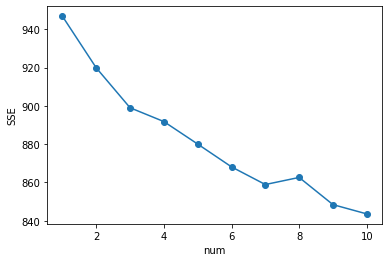

In [38]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    #获取K-means算法的SSE
    distortions.append(km.inertia_)
#绘制曲线
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("num")
plt.ylabel("SSE")
plt.show()

In [5]:
doc_word_fit = vectorizer.fit_transform(word_corpus)
feature_names = vectorizer.get_feature_names()

In [7]:
# 大文本时容易爆内存
# doc_word_mat = doc_word_fit.toarray()
# for row_index, row in enumerate(doc_word_mat):
#     print('No.',row_index)
#     print([feature_names[i] for i in row.argsort()[:-11:-1]])

In [8]:
n_components = 20
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
lda.fit(doc_word_fit)
print(lda.perplexity(doc_word_fit))

5.380868663043031e+99


In [9]:
import matplotlib.pyplot as plt
perplexity_list = []
for i in range(2,n_components):
    lda = LatentDirichletAllocation(n_components=i, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    lda.fit(doc_word_fit)
    perplexity_list.append(lda.perplexity(doc_word_fit))
plt.plot(list(range(2,n_components)), perplexity_list)
plt.show()
print(perplexity_list)
print(min(perplexity_list))

"\nimport matplotlib.pyplot as plt\nperplexity_list = []\nfor i in range(2,n_components):\n    lda = LatentDirichletAllocation(n_components=i, max_iter=5,\n                                learning_method='online',\n                                learning_offset=50.,\n                                random_state=0)\n    lda.fit(doc_word_fit)\n    perplexity_list.append(lda.perplexity(doc_word_fit))\nplt.plot(list(range(2,n_components)), perplexity_list)\nplt.show()\nprint(perplexity_list)\nprint(min(perplexity_list))\n"

In [10]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(doc_word_fit)
print_top_words(lda, feature_names, 10)

Topic #0: 中方 相待 五百强 非法行为 扫货 稳中见 得愈 无一 调仓 荷兰
Topic #1: human 文书 旭硝子 更让人 前不久 盘收 夜盘 车用 易于 突破性
Topic #2: 深表遗憾 十分重视 可观 挤垮 北美 from 投行 难点 活力 油粕
Topic #3: 船队 脱敏 content 材质 母校 太小 样子 决战 封装 将有助
Topic #4: 拥有 鸿海 讨论 源于 满意度 politics 发力 预感 并购 背后
Topic #5: 期权 中国 库存 市场 震荡 波动 美国 持仓量 现货 价格
Topic #6: 中国 激活 货物贸易 上任 受中美 营运 干翻 偏缓 良性 软体
Topic #7: 不济 历程 如一国 大开 opencpu 而移 运费 运往 压栏 谭主
Topic #8: 偏软 意见 直接对话 启动 到货 山峦 宝卓 之上 充分证明 缴纳
Topic #9: 无仓 纽约联邦储备银行 船企在 不周 偶然 质疑 前值 初创 引述 倾向

